# maleFemalePyramid.ipynb

지역별/ 나이별 인구수가 기록된 gender.csv 파일을 이용해 특정 지역의 인구구조 형태를 알아본다.



gender.csv파일에는 row[3]부터 row[104]까지는 남성인구 0세부터 100세이상까지 저장되어있고, row[104]와 row[105]에는 여자 총인구수와 연령구간인구수가 저장된다.


그리고 row[106]부터 여성의 연령별 인구수가 저장되어 있다.
해당 정보를 활용해 신도림지역의 성별인구분포를 알아본다.

In [1]:
import csv
f = open('gender.csv')
data = csv.reader(f)
m = []
f = []
for row in data:
    if '신도림' in row[0]:
        for i in range(0,101):
            m.append(int(row[i+3]))
            f.append(int(row[-(i+1)]))


좀더 직관적으로 코드를 표현하기 위해선 아래와 같이 표현한다.

In [2]:
import csv
f = open('gender.csv')
data = csv.reader(f)
m = []
f = []

for row in data:
    if  '신도림' in row[0]:
        for i in row [3:104]:
            m.append(-int(i))
        for i in row [106: ]:
            f.append(int(i))
        break
    


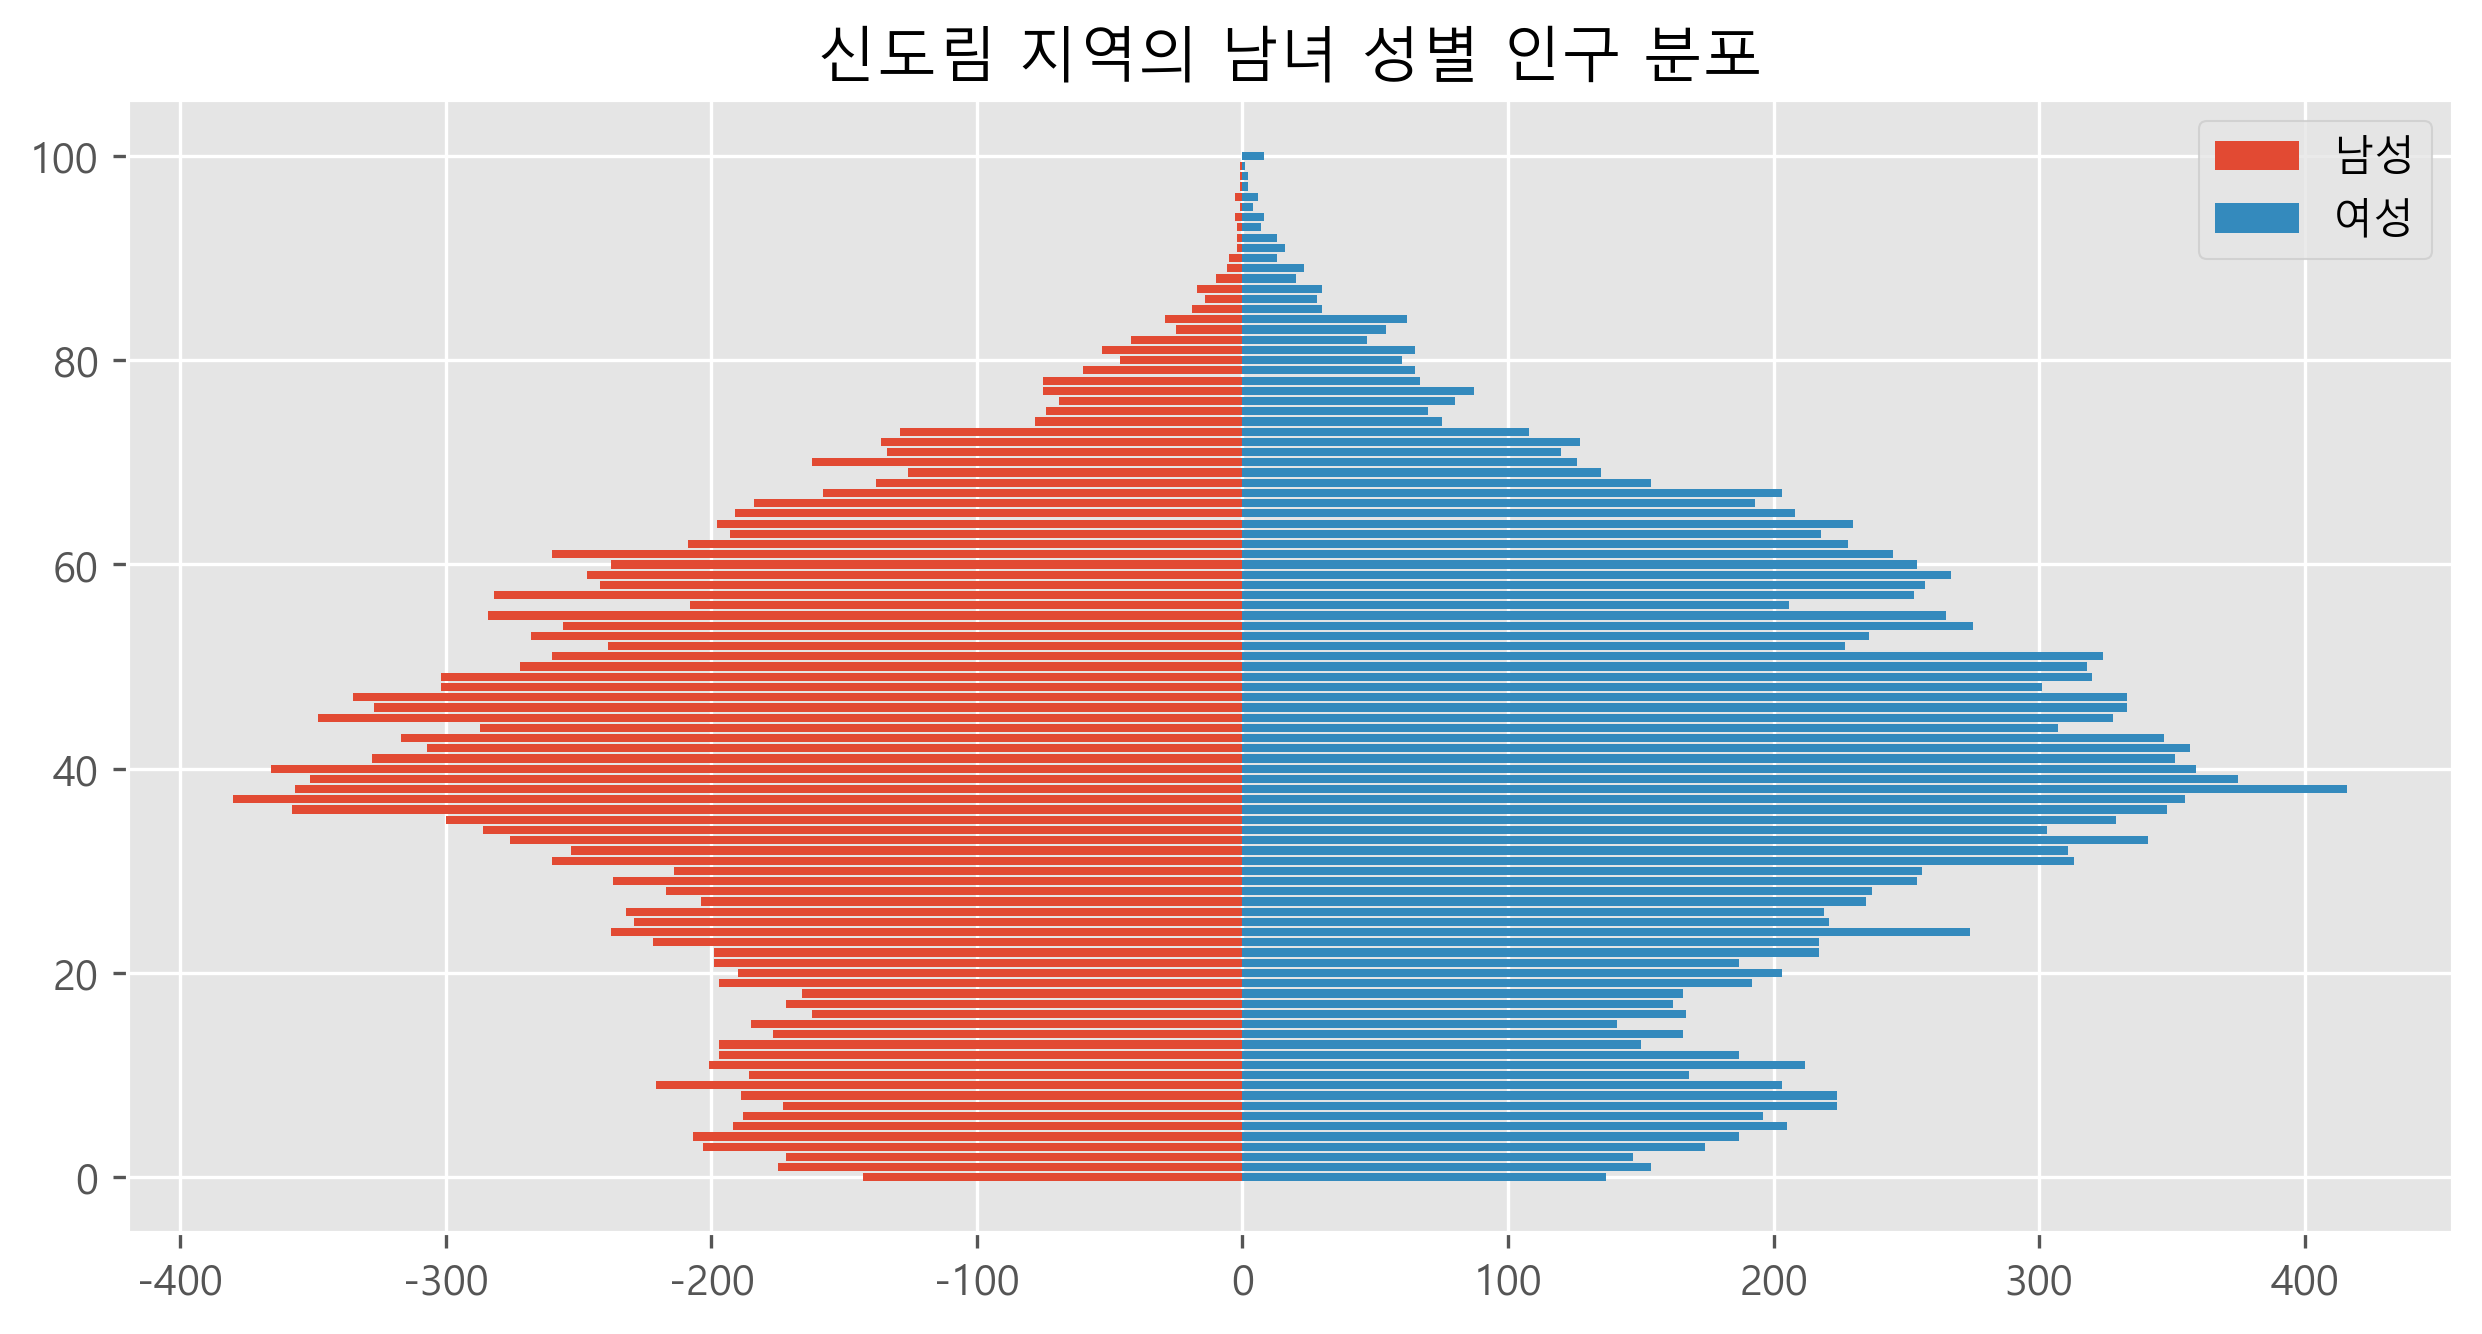

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False

plt.title('신도림 지역의 남녀 성별 인구 분포')

plt.barh(range(101),m, label='남성')
plt.barh(range(101),f, label='여성')
plt.legend()
plt.show()

지역명을 입력받아 해당 지역에 해당하는 남녀 인구 분포를 나타내는 것 역시 가능하다.

In [4]:
import csv
f = open('gender.csv')
data = csv.reader(f)
m = []
f = []
name=input('지역명 입력: ')
for row in data:
    if  name in row[0]:
        for i in row [3:104]:
            m.append(-int(i))
        for i in row [106: ]:
            f.append(int(i))
        break
# 겹치는 지역명이 존재시 오류 발생 가능

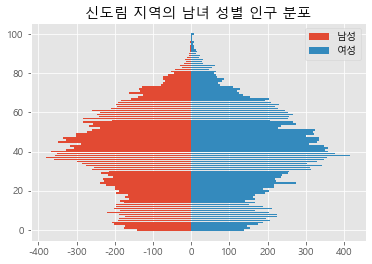

In [5]:


import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False
plt.title( name+ ' 지역의 남녀 성별 인구 분포')

plt.figure(figsize=(10 , 5) , dpi =300)
plt.barh(range(101),m, label='남성')
plt.barh(range(101),f, label='여성')
plt.legend()
plt.show()


동일한 지역명이 존재할경우 데이터가 부정확하게 도출될 수 있다.
이러한 경우를 예방하기 위해 province와 country, name 을 모두 입력 받아 모두 row[0]에 존재해야만 
데이터가 도출되도록 수정한다.

In [6]:
import csv
f = open('gender.csv')
data = csv.reader(f)
m = []
f = []
province= input('도 이름을 입력하세요 ')
country = input('구 이름을 입력하세요 ')
name  = input('읍면동 단위를 입력하세요 ')

for row in data:
    if  (province and country and name) in row[0]:
        for i in row [3:104]:
            m.append(-int(i.replace(',', '')))
        for i in row [106: ]:
            f.append(int(i.replace(',', '')))
        break
            

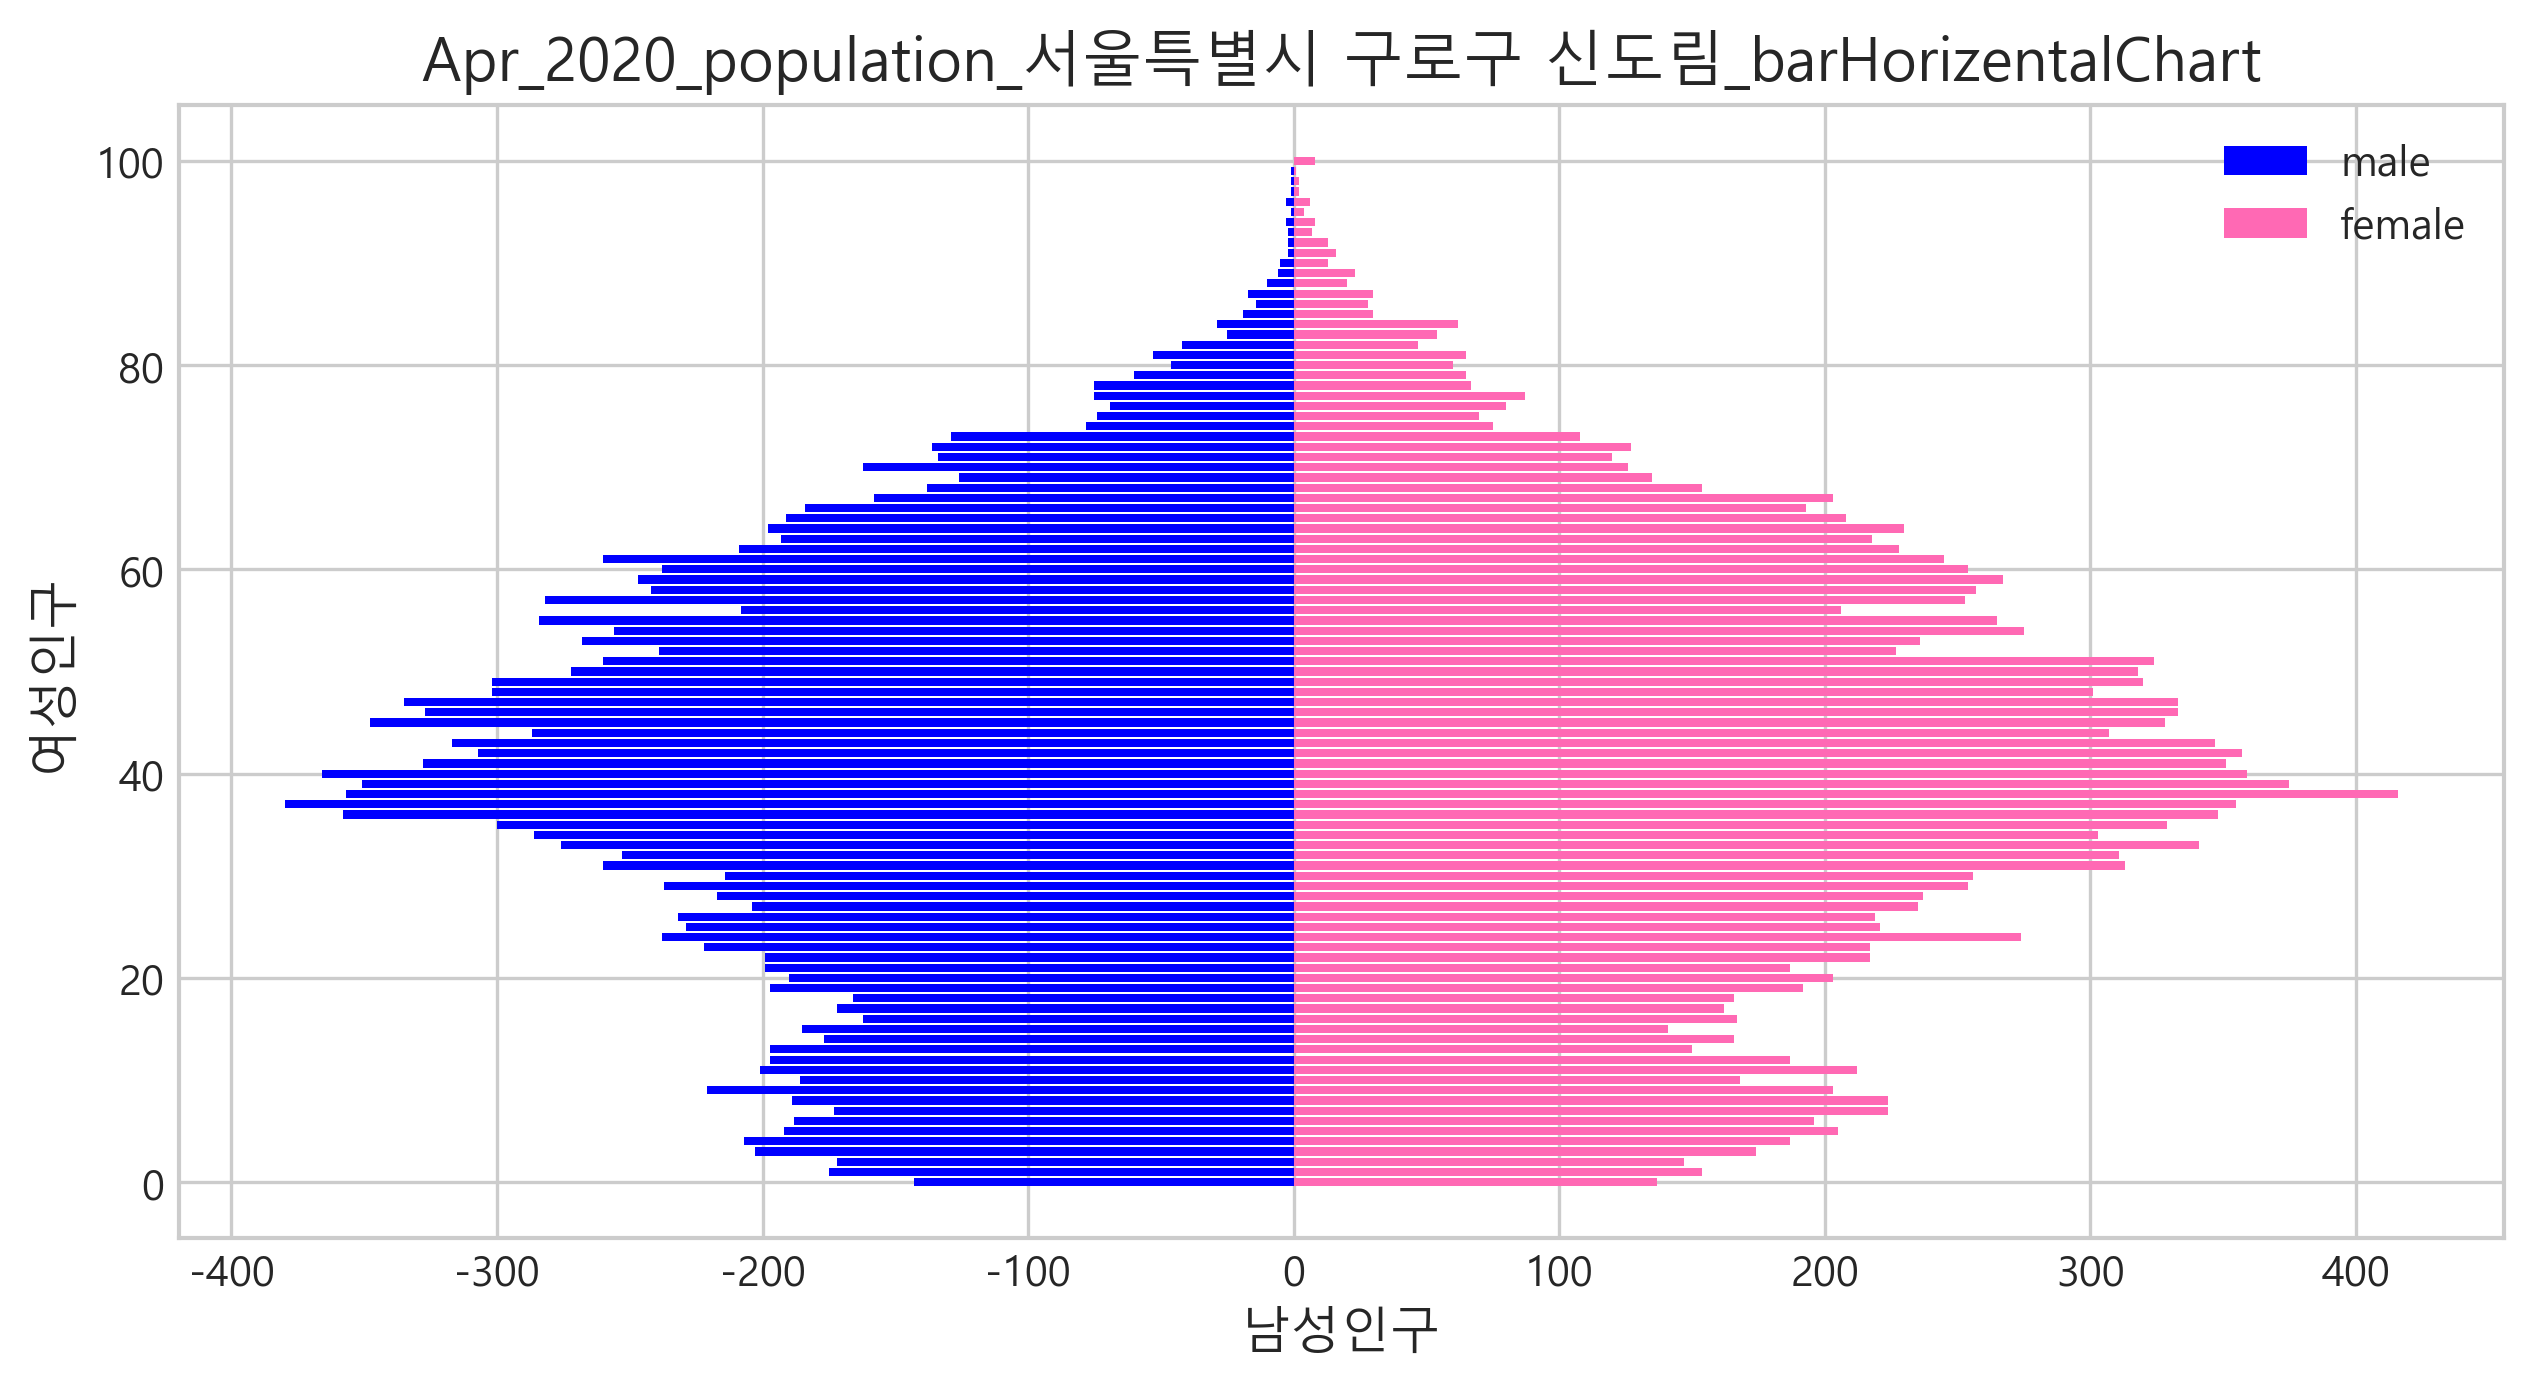

In [8]:

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10 , 5) , dpi =300)

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False

plt.title('Apr_2020_population_' +province+" "+country+ " "+ name + '_barHorizentalChart')
plt.xlabel('남성인구')
plt.ylabel('여성인구')
            
plt.barh( range(101), m , color= 'blue', label = 'male' )         
plt.barh(range(101), f , color= 'hotpink', label = 'female')
plt.legend() 
plt.show()
